In [1]:
from SVC import SVC
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cvxpy as cp
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.datasets import load_iris, make_moons, make_blobs
import networkx as nx
import seaborn as sns
from sklearn.decomposition import PCA
import sklearn.datasets, time, matplotlib

/Users/Meilame/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Blobs

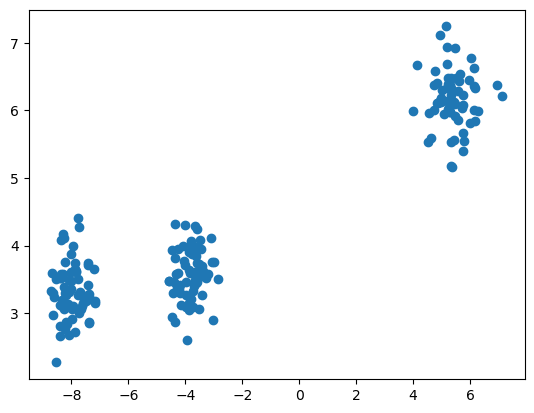

In [4]:
X = make_blobs(n_samples=200,centers=3,cluster_std=0.45)[0]
plt.scatter(X[:,0],X[:,1])

100%|██████████| 200/200 [00:07<00:00, 25.56it/s]


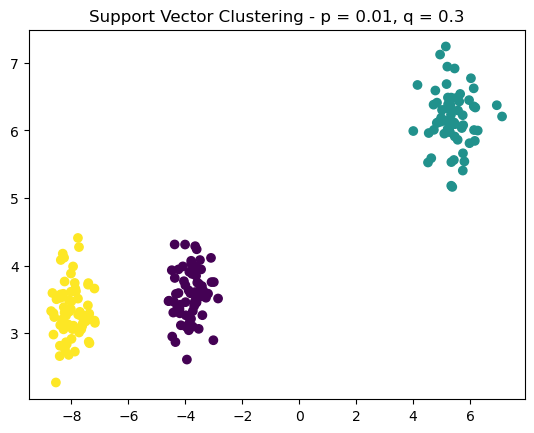

In [5]:
q = 0.3 #increase to make more clusters
p = 0.01
labels, support_vectors, bounded_support_vectors = SVC(X, p,q)
print("Number of support vectors: {}".format(len(support_vectors)))
print("Number of bounded support vectors: {}".format(len(bounded_support_vectors)))
print("Number of clusters: {}".format(len(set(labels))))
plt.scatter(X[support_vectors][:,0], X[support_vectors][:,1],  facecolors='none', edgecolors='r')
plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("Support Vector Clustering - p = {}, q = {}".format(p,q) )
plt.show()


100%|██████████| 200/200 [00:01<00:00, 109.77it/s]


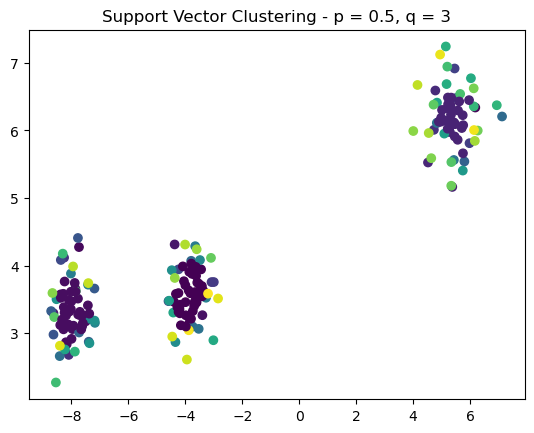

In [14]:
q = 3 #increase to make more clusters
p = 0.5
labels = SVC(X, p,q)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("Support Vector Clustering - p = {}, q = {}".format(p,q) )
plt.show()


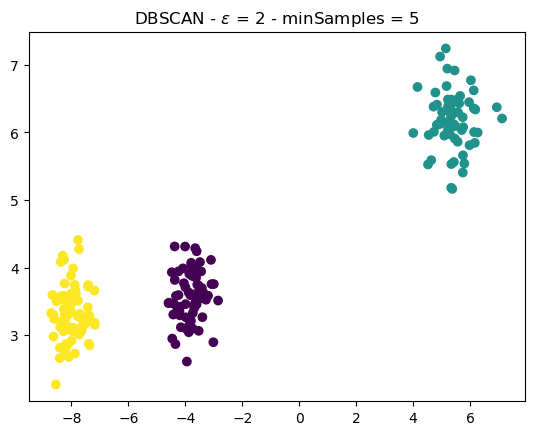

In [7]:
eps = 2
minsamples = 5
labels_DBS = DBSCAN(eps=eps, min_samples=minsamples).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels_DBS)
plt.title(r"DBSCAN - $\epsilon$ = {} - minSamples = {}".format(eps, minsamples))
plt.show()

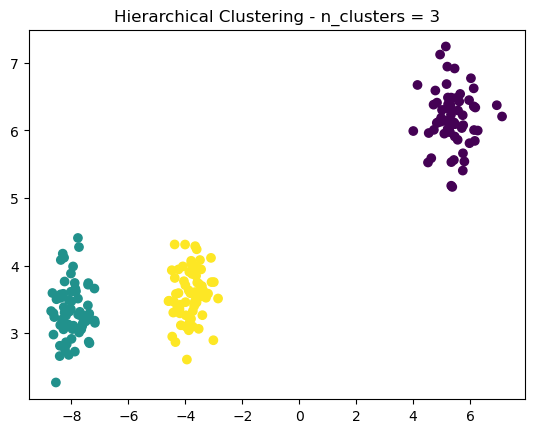

In [10]:
labels_hierar = AgglomerativeClustering(n_clusters=3).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels_hierar)
plt.title("Hierarchical Clustering - n_clusters = 3")
plt.show()

/Users/Meilame/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


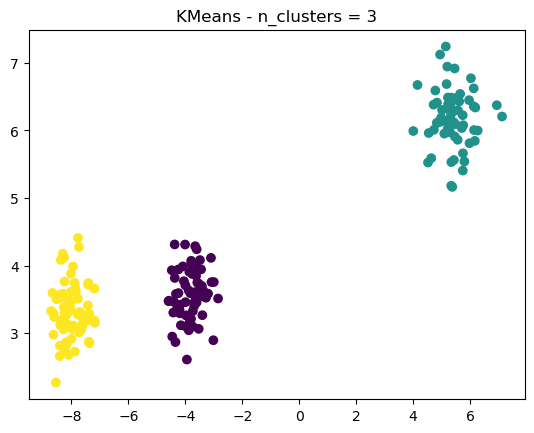

In [11]:
labels_kmeans = KMeans(n_clusters=3).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels_kmeans)
plt.title("KMeans - n_clusters = 3")
plt.show()


# Two Moons

In [12]:
data,labels = make_moons(100,noise=0.1)
data -= np.mean(data,axis=0)

X = data


100%|██████████| 100/100 [00:00<00:00, 116.00it/s]

Number of support vectors: 32
Number of bounded support vectors: 0
Number of clusters: 3


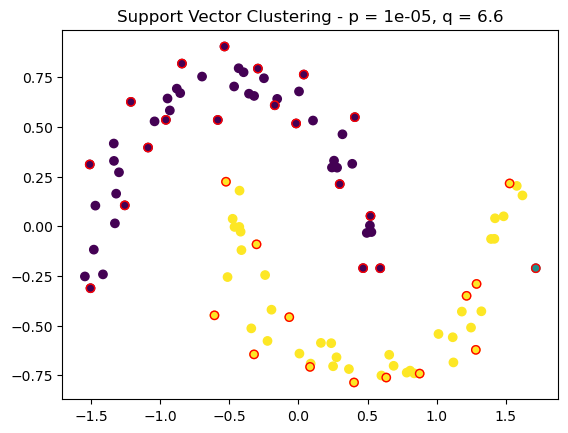

In [28]:
q = 6.6
p = 0.00001
labels, support_vectors, bounded_support_vectors = SVC(X, p,q)
print("Number of support vectors: {}".format(len(support_vectors)))
print("Number of bounded support vectors: {}".format(len(bounded_support_vectors)))
print("Number of clusters: {}".format(len(set(labels))))
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(X[support_vectors][:,0], X[support_vectors][:,1],  facecolors='none', edgecolors='r')
plt.title("Support Vector Clustering - p = {}, q = {}".format(p,q) )
plt.show()

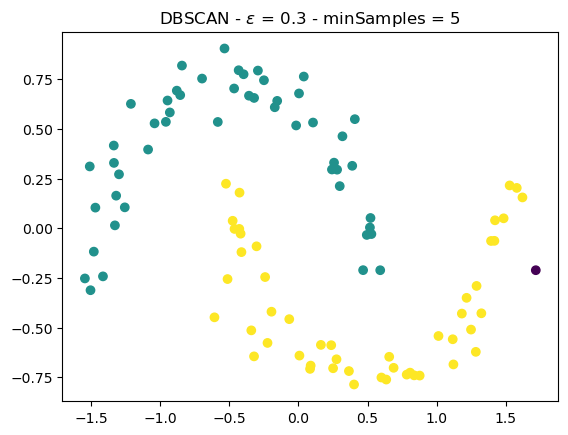

In [16]:
eps = 0.3
minsamples = 5
labels_DBS = DBSCAN(eps=eps, min_samples=minsamples).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels_DBS)
plt.title(r"DBSCAN - $\epsilon$ = {} - minSamples = {}".format(eps, minsamples))
plt.show()

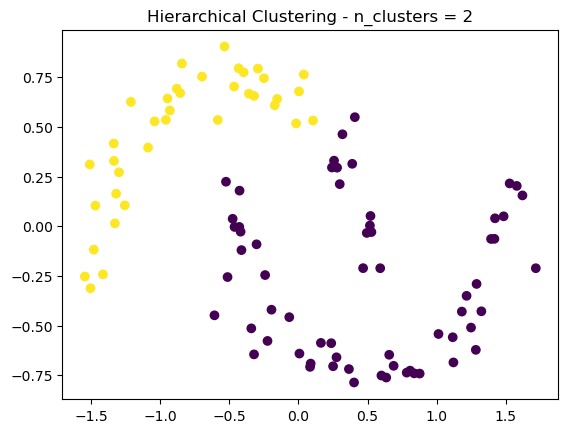

In [41]:
labels_hierar = AgglomerativeClustering(n_clusters=2, linkage='average').fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels_hierar)
plt.title("Hierarchical Clustering - n_clusters = 2")
plt.show()


/Users/Meilame/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


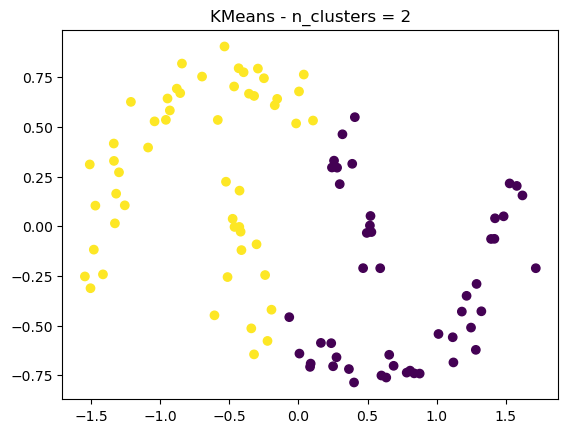

In [29]:
labels_kmeans = KMeans(n_clusters=2).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels_kmeans)
plt.title("KMeans - n_clusters = 2")
plt.show()

# Iris

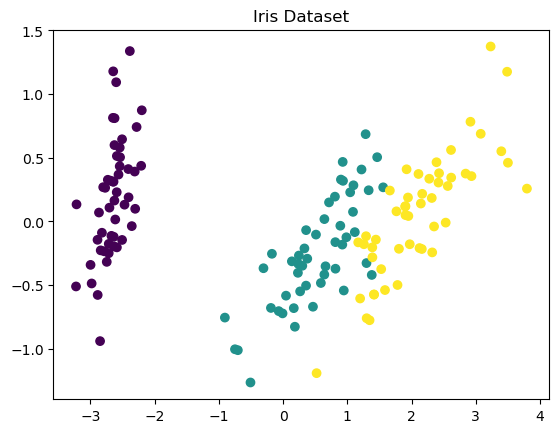

In [42]:
iris = pd.DataFrame(load_iris().data,columns=load_iris().feature_names)
target = pd.DataFrame(load_iris().target,columns=['target'])
X = iris.values
X_PCA = PCA(n_components=2).fit_transform(X)

plt.scatter(X_PCA[:,0],X_PCA[:,1],c=target['target'])
plt.title("Iris Dataset")
plt.show()

100%|██████████| 150/150 [00:02<00:00, 61.28it/s]


Number of support vectors: 36
Number of bounded support vectors: 12
Number of clusters: 16


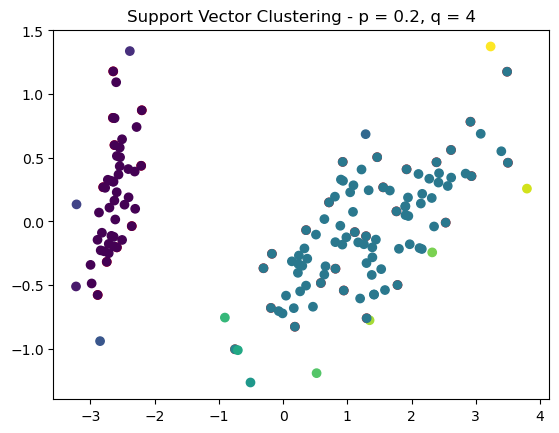

In [59]:
q = 4
p = 0.2

labels, support_vectors, bounded_support_vectors = SVC(X_PCA, p,q)
print("Number of support vectors: {}".format(len(support_vectors)))
print("Number of bounded support vectors: {}".format(len(bounded_support_vectors)))
print("Number of clusters: {}".format(len(set(labels))))
plt.scatter(X_PCA[support_vectors][:,0], X_PCA[support_vectors][:,1],  facecolors='none', edgecolors='r')
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=labels)
plt.title("Support Vector Clustering - p = {}, q = {}".format(p,q) )
plt.show()

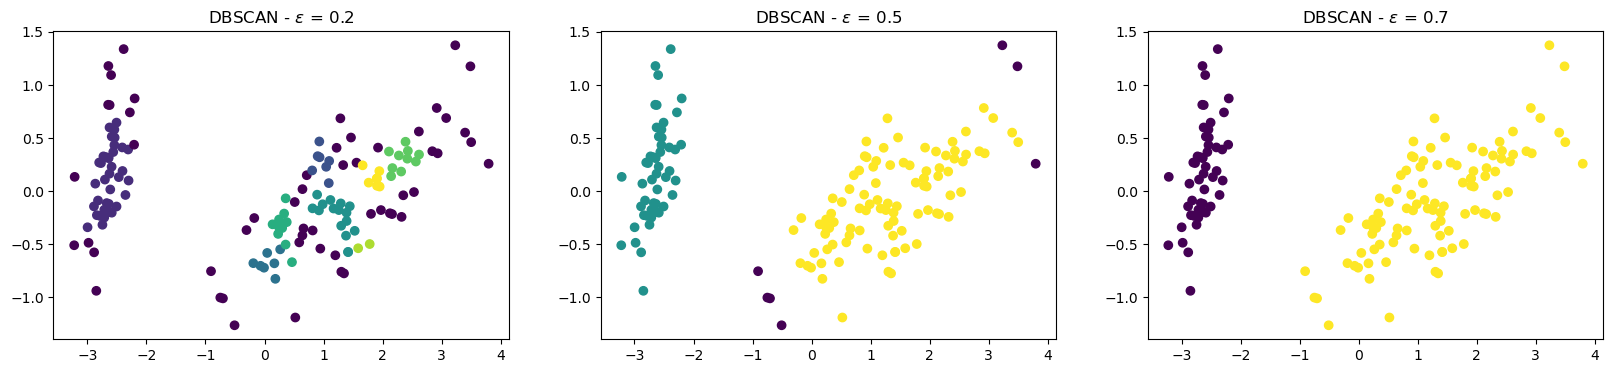

In [100]:
epss = [0.2, 0.5, 0.7]

plt.subplots(1,3,figsize=(20,4))
for i, eps in enumerate(epss):
    plt.subplot(1,3,i+1)
    labels_DBS = DBSCAN(eps=eps, min_samples=5).fit_predict(X_PCA)
    plt.scatter(X_PCA[:,0], X_PCA[:,1], c=labels_DBS)
    plt.title(r"DBSCAN - $\epsilon$ = {}".format(eps))

plt.show()